Purpose of this file: 

1. Create the district level files in a form that can be used in regression analysis and network visualization (long, transposed, non-cumulative percentages)
2. Produce some lollipop plots that can show the changes in mobility pre-post lockdown
3. Do some kind of PCA/factor analysis or shapley decomposition to illustrate the characteristics of districts that:

- (a) had greater movement pre-pandemic <br>
- (b) had least movement during the pandemic <br>
- (c) had the greatest drops in movement pre/post 


In [1]:
#global paths
data_viz_path="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/09_Visualization/data/preprocessed/"
dist_names="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/shapefiles/60_districts/ZWE_adm2.csv"
#paths
cumul_path="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/mobility/district_level/probabilities/"
noncumul_path="/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/mobility/district_level/probabilities/"
plot_path = "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/mobility/district_level/plots/"
#original, cumulative OD matrices
pre_ld_mm= "daily_region_transition_probability-new-district-pre-lockdown_i5.csv"
post_ld_mm= "daily_region_transition_probability-new-district-post-lockdown_i5.csv"

early_ld="i5_ld_15th_to_29th_march_district_odm.csv"
late_ld="i5_ld_april_district_odm.csv"

#combined 
cumul_input_nld=cumul_path+pre_ld_mm
cumul_input_ld=cumul_path+post_ld_mm

cumul_input_eLd=cumul_path+early_ld
cumul_input_lLd=cumul_path+late_ld

#non cumulative output files
non_cum_pre_ld_mm= "noncumul_nld_weekly_movement_i5.csv"
non_cum_ld_mm = "noncumul_ld_weekly_movement_i5.csv"

non_cum_eLd = "noncumul_eLd_weekly_movement_i5.csv"
non_cum_lLd = "noncumul_lLd_weekly_movement_i5.csv"


#non cumulative path and file
noncumul_output_nld= noncumul_path+non_cum_pre_ld_mm
noncumul_output_ld= noncumul_path+non_cum_ld_mm

noncumul_output_eLd= noncumul_path+non_cum_eLd
noncumul_output_lLd= noncumul_path+non_cum_lLd

#non cumulative output files - daily 
daily_noncum_pre_ld_mm= "daily_noncumul_nld_movement_i5.csv"
daily_noncum_ld_mm = "daily_noncumul_ld_movement_i5.csv"

#daily non cumulative path and file
daily_noncumul_output_nld= noncumul_path+daily_noncum_pre_ld_mm
daily_noncumul_output_ld= noncumul_path+daily_noncum_ld_mm


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# use Robbie's code to convert the lockdown cumulative into a non-cumulative matrix 

## here's the function:
def convert_cumulative_od_matrix_to_probabilities(data_path, save_path, average_week):
    """
    A function to convert the cumulative probability OD matrix to the probability of each someone in a given
    district visiting a given district
    :param data_path: Where you have the OD matrix saved
    :param save_path: Where you want to save the new matrix
    :param average_week: Boolean, if you want to keep the probabilities for each day or just average the week out
    :return:
    """
    data = pd.read_csv(data_path)
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    for idx in data.index:
        cumulative_values = list(data.iloc[idx][2:])
        displaced_cumulative_values = np.insert(np.delete(cumulative_values, -1), 0, 0)
        probabilities = cumulative_values - displaced_cumulative_values
        probabilities = probabilities / 100
        data.iloc[idx][2:] = probabilities
        for idx_2, val in enumerate(data.columns[2:]):
            data.loc[idx, val] = probabilities[idx_2]
    if average_week:
        data = data.groupby('home_region').mean()
        data = data.drop('weekday', axis=1)
        try:
            data = data.drop('weekday', axis=1)
        except KeyError:
            print("not found")
    data.to_csv(save_path)

## District level

### Weekly

In [4]:
#create the early non-cum weekly version
convert_cumulative_od_matrix_to_probabilities(cumul_input_eLd, noncumul_output_eLd, True)
# now I have the non-cumulative matrices, convert these so they can be used in network diagrams 
## NLD
eLd_df = pd.read_csv(noncumul_output_eLd)
# Reset the index to be the first column name ('Category')
eLd_df =eLd_df.set_index('home_region')
eLd_df.head()
## if True the function will convert the OD matrix to weekly averages, if False, it will keep as daily

<ipython-input-3-74d37b3d4440>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[idx][2:] = probabilities


not found


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
home_region,,,,,,,,,,,,,,,,,,,,,
d_1,0.821683,0.003768,0.000282,0.000064,0.000037,0.000089,0.000320,0.000000,0.000011,0.000016,...,0.003857,0.019398,0.000479,0.000152,0.000481,0.006739,0.003016,0.00085,0.000452,0.002128
d_10,0.000000,0.047019,0.000000,0.000000,0.000000,0.000598,0.000495,0.000213,0.000000,0.557994,...,0.000000,0.000000,0.000366,0.000000,0.000000,0.000369,0.000465,0.00000,0.000000,0.000000
d_11,0.000000,0.013238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
d_12,0.000000,0.012042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
d_13,0.000051,0.177783,0.000056,0.000022,0.000000,0.000662,0.000413,0.000267,0.000000,0.085078,...,0.000000,0.000000,0.000371,0.000000,0.000022,0.000339,0.000492,0.00000,0.000025,0.000000


### early-lockdown first 

In [5]:
# Transpose/pivot
#interchage the ld and eLd as I'm creating this 
df=eLd_df

df_t = df.stack().reset_index()
df_t.columns = ['source', 'target', 'weight']
# Split d_ so i have numbers
# Convert elements to strings
df_t['source'] = df_t['source'].astype(str)

df_t['dist_no'] = df_t['source'].str.split('d_')

# Extract the elements after 'd_'
df_t['dist_no'] = df_t['dist_no'].str[1]
df_t['dist_no'] = df_t['dist_no'].astype(int)

df_t.head()

# note I used this https://medium.com/gitconnected/5-extremely-useful-plots-for-data-scientists-that-you-never-knew-existed-5b92498a878f

,source,target,weight,dist_no
0,d_1,d_1,0.821683,1
1,d_1,d_2,0.003768,1
2,d_1,d_3,0.000282,1
3,d_1,d_4,0.000064,1
4,d_1,d_5,0.000037,1


In [6]:
#clean it up a bit for export 
prob_move = df_t
prob_move.rename(columns={'weight':'eLd_prob_move'}, inplace=True)
#prob_move.drop(columns=[ 'ward_no'], inplace=True)
prob_move=prob_move.round(3)

#save output 
prob_move.to_csv(noncumul_path+"d_prob_move_pairs_eLd.csv", index=False)
prob_move.head()

,source,target,eLd_prob_move,dist_no
0,d_1,d_1,0.822,1
1,d_1,d_2,0.004,1
2,d_1,d_3,0.000,1
3,d_1,d_4,0.000,1
4,d_1,d_5,0.000,1


In [7]:
#keeping just a version with the probability of staying in each ward
eLd_prob_stay=prob_move
# eLd_prob_stay['source'] = eLd_prob_stay['source'].str.replace('^w_0000', '', regex=True)
# eLd_prob_stay['target'] = eLd_prob_stay['target'].str.replace('^wp_', '', regex=True)
eLd_prob_stay =prob_move[prob_move['source']==prob_move['target']]
eLd_prob_stay.rename(columns={'eLd_prob_move':'eLd_prob_stay'}, inplace=True)
eLd_prob_stay['eLd_prob_leave']= 1- eLd_prob_stay['eLd_prob_stay'].round(3)
#eLd_prob_stay=eLd_prob_stay.drop(columns=['dist_no'])

eLd_prob_stay.to_csv(noncumul_path+"d_eLd_prob_stay_leave_eLd.csv", index=False)
eLd_prob_stay.head()

<ipython-input-7-2042a90bdcba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eLd_prob_stay.rename(columns={'eLd_prob_move':'eLd_prob_stay'}, inplace=True)
<ipython-input-7-2042a90bdcba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eLd_prob_stay['eLd_prob_leave']= 1- eLd_prob_stay['eLd_prob_stay'].round(3)


,source,target,eLd_prob_stay,dist_no,eLd_prob_leave
0,d_1,d_1,0.822,1,0.178
69,d_10,d_10,0.558,10,0.442
130,d_11,d_11,0.571,11,0.429
191,d_12,d_12,0.819,12,0.181
252,d_13,d_13,0.489,13,0.511


In [8]:
# import names as labels for gephy

dist_names_df = pd.read_csv(dist_names)

dist_names_df = dist_names_df[['ID_2', 'NAME_2', 'COMB']]

# dist_names['ID_2']= dist_names['ID_2'].astype(int)
# retain the names and numbers only
dist_names_df.head()

,ID_2,NAME_2,COMB
0,1,Bulawayo,1-Bulawayo
1,2,Harare,2-Harare
2,3,Buhera,3-Buhera
3,4,Chimanimani,4-Chimanimani
4,5,Chipinge,5-Chipinge


In [9]:
eLd_prob_stay.head()

,source,target,eLd_prob_stay,dist_no,eLd_prob_leave
0,d_1,d_1,0.822,1,0.178
69,d_10,d_10,0.558,10,0.442
130,d_11,d_11,0.571,11,0.429
191,d_12,d_12,0.819,12,0.181
252,d_13,d_13,0.489,13,0.511


In [10]:
#merge with each of the dataframes and export 
# Merge DataFrames on the common column
eLd_prob_stay = pd.merge(dist_names_df, eLd_prob_stay, left_on='ID_2', right_on='dist_no', how='left')
# rename the label
eLd_prob_stay.rename(columns={'NAME_2': 'label'}, inplace=True)
eLd_prob_stay=eLd_prob_stay[['label', 'source', 'target', 'eLd_prob_stay', 'dist_no', 'eLd_prob_leave']]
#export the csv
eLd_prob_stay.to_csv(noncumul_path+"eLd_prob_stay_names.csv",index=False)


eLd_prob_stay.head()

,label,source,target,eLd_prob_stay,dist_no,eLd_prob_leave
0,Bulawayo,d_1,d_1,0.822,1,0.178
1,Harare,d_2,d_2,0.667,2,0.333
2,Buhera,d_3,d_3,0.634,3,0.366
3,Chimanimani,d_4,d_4,0.617,4,0.383
4,Chipinge,d_5,d_5,0.873,5,0.127


### later lockdown file

In [11]:

#create the ld non-cum weekly version
convert_cumulative_od_matrix_to_probabilities(cumul_input_lLd, noncumul_output_lLd, True)

# convert it 
lLd_df = pd.read_csv(noncumul_output_lLd)
# Reset the index to be the first column name ('Category')
lLd_df = lLd_df.set_index('home_region')
lLd_df.head()

<ipython-input-3-74d37b3d4440>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[idx][2:] = probabilities


not found


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60
home_region,,,,,,,,,,,,,,,,,,,,,
d_1,0.917136,0.000496,0.00005,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.001342,0.006715,0.000109,0.0,0.00003,0.001229,0.000483,0.000132,0.000087,0.000299
d_10,0.000000,0.008966,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.695345,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000034,0.000000,0.000000,0.000000
d_11,0.000000,0.002713,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.002773,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
d_12,0.000000,0.001940,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000383,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
d_13,0.000000,0.076779,0.00000,0.0,0.0,0.000148,0.000026,0.0,0.0,0.065729,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000105,0.000163,0.000000,0.000000,0.000000


In [12]:
# Transpose/pivot
#interchange the ld and ld as I'm creating this 
df=lLd_df

lLd_df_t = df.stack().reset_index()
lLd_df_t.columns = ['source', 'target', 'weight']
lLd_df_t.rename(columns={'weight':'lLd_prob_move'}, inplace=True)
# Split d_ so i have numbers
# Convert elements to strings
lLd_df_t['source'] = lLd_df_t['source'].astype(str)

lLd_df_t['dist_no'] = lLd_df_t['source'].str.split('d_')

# Extract the elements after 'd_'
lLd_df_t['dist_no'] = lLd_df_t['dist_no'].str[1]
lLd_df_t['dist_no'] = lLd_df_t['dist_no'].astype(int)

lLd_df_t.head()


,source,target,lLd_prob_move,dist_no
0,d_1,d_1,0.917136,1
1,d_1,d_2,0.000496,1
2,d_1,d_3,0.000050,1
3,d_1,d_4,0.000000,1
4,d_1,d_5,0.000000,1


In [13]:
#clean it up a bit for export 
lLd_prob_move = lLd_df_t
lLd_prob_move=lLd_prob_move.round(3)

#save output 
lLd_prob_move.to_csv(noncumul_path+"d_prob_move_pairs_lLd.csv", index=False)
lLd_prob_move.head()

,source,target,lLd_prob_move,dist_no
0,d_1,d_1,0.917,1
1,d_1,d_2,0.000,1
2,d_1,d_3,0.000,1
3,d_1,d_4,0.000,1
4,d_1,d_5,0.000,1


In [14]:
#keeping just a version with the probability of staying in each ward
lLd_prob_stay=lLd_prob_move
lLd_prob_stay =lLd_prob_move[lLd_prob_move['source']==lLd_prob_move['target']]
lLd_prob_stay.rename(columns={'lLd_prob_move':'lLd_prob_stay'}, inplace=True)
lLd_prob_stay['lLd_prob_leave']= 1- lLd_prob_stay['lLd_prob_stay']

lLd_prob_stay.to_csv(noncumul_path+"d_prob_stay_leave_lLd.csv", index=False)
lLd_prob_stay.head()

<ipython-input-14-3da74d50bb29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lLd_prob_stay.rename(columns={'lLd_prob_move':'lLd_prob_stay'}, inplace=True)
<ipython-input-14-3da74d50bb29>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lLd_prob_stay['lLd_prob_leave']= 1- lLd_prob_stay['lLd_prob_stay']


,source,target,lLd_prob_stay,dist_no,lLd_prob_leave
0,d_1,d_1,0.917,1,0.083
69,d_10,d_10,0.695,10,0.305
130,d_11,d_11,0.606,11,0.394
191,d_12,d_12,0.846,12,0.154
252,d_13,d_13,0.688,13,0.312


In [15]:
eLd_prob_stay.head()

,label,source,target,eLd_prob_stay,dist_no,eLd_prob_leave
0,Bulawayo,d_1,d_1,0.822,1,0.178
1,Harare,d_2,d_2,0.667,2,0.333
2,Buhera,d_3,d_3,0.634,3,0.366
3,Chimanimani,d_4,d_4,0.617,4,0.383
4,Chipinge,d_5,d_5,0.873,5,0.127


In [16]:
# combined Df for sankey or lolipops

comb_prob_stay = pd.merge(eLd_prob_stay, lLd_prob_stay, on='dist_no')


comb_prob_stay=comb_prob_stay.drop(['source_y', 'target_y'], axis=1)
comb_prob_stay.to_csv(noncumul_path+"d_comb_prob_stay_elLd.csv",index=False)
comb_prob_stay.head()

,label,source_x,target_x,eLd_prob_stay,dist_no,eLd_prob_leave,lLd_prob_stay,lLd_prob_leave
0,Bulawayo,d_1,d_1,0.822,1,0.178,0.917,0.083
1,Harare,d_2,d_2,0.667,2,0.333,0.802,0.198
2,Buhera,d_3,d_3,0.634,3,0.366,0.702,0.298
3,Chimanimani,d_4,d_4,0.617,4,0.383,0.690,0.310
4,Chipinge,d_5,d_5,0.873,5,0.127,0.909,0.091


In [17]:
#Let's have another one that also shows the probability of leaving in nonlockdown 


nld_prob_stay  = pd.read_csv(noncumul_path+"d_comb_prob_stay.csv")

nld_prob_stay.head()

comb_prob_stay = pd.merge(comb_prob_stay, nld_prob_stay, on = 'dist_no')
comb_prob_stay= comb_prob_stay[['label_x', 'source_x_x', 'target_x_x', 'eLd_prob_stay', 'dist_no', 'eLd_prob_leave', 'lLd_prob_leave', 'nld_prob_leave', 'ld_prob_leave']]
comb_prob_stay.rename(columns={'label_x':'label'}, inplace=True)

#and calculates the difference
comb_prob_stay['diff_lLd_nLd']=comb_prob_stay['lLd_prob_leave']-comb_prob_stay['nld_prob_leave']
comb_prob_stay['diff_eLd_nLd']=comb_prob_stay['eLd_prob_leave']-comb_prob_stay['nld_prob_leave']

comb_prob_stay.head()
comb_prob_stay.to_csv(noncumul_path+"d_comb_prob_leave_nld_elLd.csv",index=False)


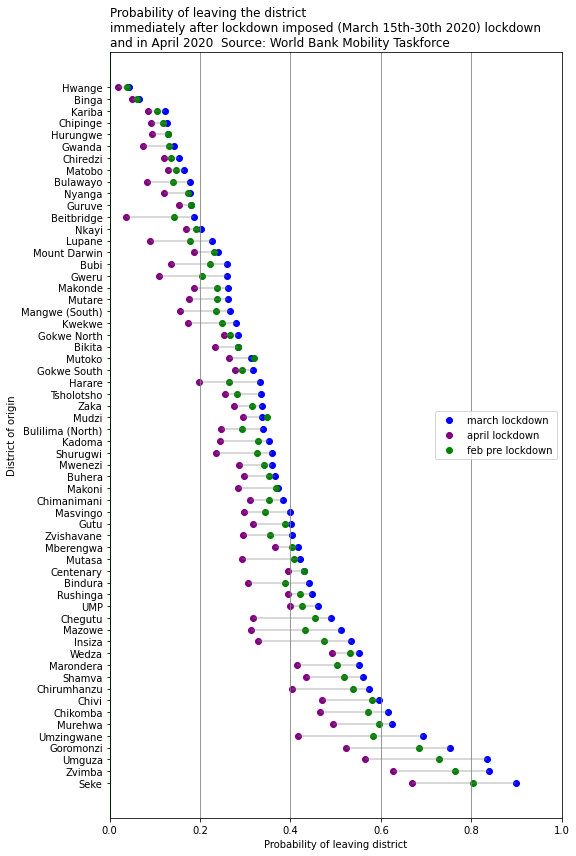

In [18]:
# let's make a lolipop plot out of this with prob leave (so that it's clear the probabilities change between the two time periods )

# Reorder it following the values of the first value:
ordered_df = comb_prob_stay.sort_values(by='eLd_prob_leave')

my_range=range(1,len(comb_prob_stay['eLd_prob_leave'].index)+1)
fig, ax = plt.subplots (figsize = (8, 12))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=list(ordered_df['eLd_prob_leave']), xmax=list(ordered_df['lLd_prob_leave']), color='grey', alpha=0.4)
plt.scatter(ordered_df['eLd_prob_leave'], my_range, color='blue', alpha=1, label='march lockdown')
plt.scatter(ordered_df['lLd_prob_leave'], my_range, color='purple', alpha=1 , label='april lockdown')
plt.scatter(ordered_df['nld_prob_leave'], my_range, color='green', alpha=1, label='feb pre lockdown')
plt.legend(loc='center right')
 
# Add title and axis names
plt.yticks(my_range, ordered_df['label'], fontsize=10, weight=14, color='black')
plt.title("Probability of leaving the district \nimmediately after lockdown imposed (March 15th-30th 2020) lockdown \nand in April 2020  Source: World Bank Mobility Taskforce", loc='left')
plt.xlabel('Probability of leaving district')
plt.ylabel('District of origin')
ax.set_facecolor('white')
plt.grid(color='grey', axis="x")
plt.axvline(0, color="green", linewidth=1) # adding black line

#invert axis 
plt.gca().invert_yaxis()

# use adjust text function 
plt.tight_layout()
#limit range on axis
plt.xlim([0, 1])

# Show the graph
plt.savefig(plot_path+'prob_leave_eLd_lLd_lolipop.png', dpi=300, facecolor = 'white')

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 38 to 51
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         60 non-null     object 
 1   dist_no       60 non-null     int64  
 2   diff_lLd_nLd  60 non-null     float64
 3   diff_eLd_nLd  60 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


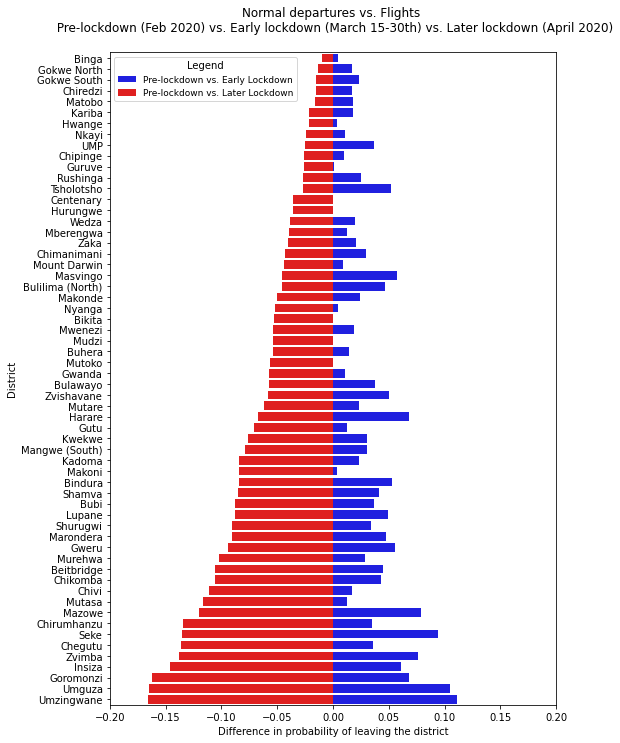

In [19]:
# Let's do another one with just the difference between nld and lockdown, ranking by the difference then can place side by side 

bar_data = comb_prob_stay[['label', 'dist_no', 'diff_lLd_nLd', 'diff_eLd_nLd']]
bar_data = bar_data.sort_values(by='diff_lLd_nLd', ascending=False)
bar_data.info()
plt.figure(figsize=(8,12))
plt.tight_layout()
# Normalize the ranks to create a gradient effect
norm = np.linspace(0, 1, len(bar_data))

sns.barplot(data=bar_data, x="diff_eLd_nLd", y="label", color='Blue', label='Pre-lockdown vs. Early Lockdown')
sns.barplot(data=bar_data, x="diff_lLd_nLd", y="label", color='Red', label='Pre-lockdown vs. Later Lockdown')

plt.ylabel("District")
plt.xlabel("Difference in probability of leaving the district")
plt.xlim(-.2, .2)
plt.title('Normal departures vs. Flights \n Pre-lockdown (Feb 2020) vs. Early lockdown (March 15-30th) vs. Later lockdown (April 2020)\n', fontsize=12 )
plt.legend(title='Legend', loc='upper left', fontsize=9)

# export

plt.savefig(plot_path+'diff_dist_prob_nld_elLd.png', dpi=300, facecolor="white")



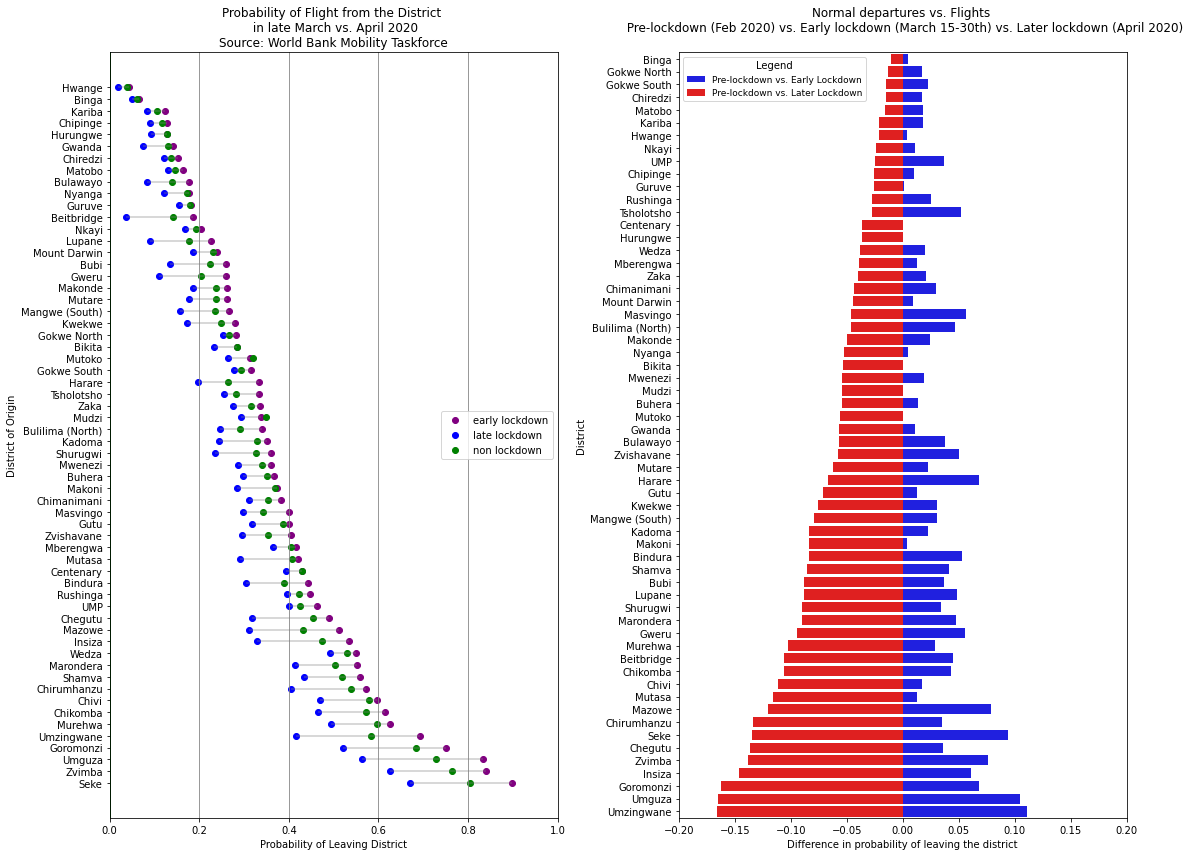

In [20]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Left subplot - Horizontal plot
axes[0].hlines(y=my_range, xmin=list(ordered_df['eLd_prob_leave']), 
               xmax=list(ordered_df['lLd_prob_leave']), color='grey', alpha=0.4)

# Scatter plots on the left subplot
axes[0].scatter(ordered_df['eLd_prob_leave'], my_range, color='purple', alpha=1, label='early lockdown')
axes[0].scatter(ordered_df['lLd_prob_leave'], my_range, color='blue', alpha=1, label='late lockdown')
axes[0].scatter(ordered_df['nld_prob_leave'], my_range, color='green', alpha=1, label='non lockdown')

# Configure left subplot
axes[0].legend(loc='center right')
axes[0].set_yticks(my_range)
axes[0].set_yticklabels(ordered_df['label'], fontsize=10,  color='black')
axes[0].set_title("Probability of Flight from the District \n in late March vs. April 2020\nSource: World Bank Mobility Taskforce", loc='center', fontsize=12)
axes[0].set_xlabel('Probability of Leaving District')
axes[0].set_ylabel('District of Origin')
axes[0].set_facecolor('white')
axes[0].grid(color='grey', axis="x")
axes[0].axvline(0, color="green", linewidth=1)  # Adding vertical line
axes[0].invert_yaxis()  # Invert Y-axis
axes[0].set_xlim([0, 1])  # Limit X-axis range

# Right subplot - Bar plot
bar_data = comb_prob_stay[['label', 'dist_no', 'diff_eLd_nLd', 'diff_lLd_nLd']].sort_values(by='diff_lLd_nLd', ascending=False)

# Normalize the ranks to create a gradient effect
norm = np.linspace(0, 1, len(bar_data))
# Create a color gradient from red to blue
colors = sns.color_palette("PuOr", as_cmap=True)(norm)

# Create bar plot on the right subplot
sns.barplot(data=bar_data, x="diff_eLd_nLd", y="label", color='Blue', label='Pre-lockdown vs. Early Lockdown', ax=axes[1])
sns.barplot(data=bar_data, x="diff_lLd_nLd", y="label", color='Red', label='Pre-lockdown vs. Later Lockdown', ax=axes[1])


axes[1].set_ylabel("District")
axes[1].set_xlabel("Difference in probability of leaving the district")
axes[1].set_xlim(-.2, .2)
axes[1].set_title('Normal departures vs. Flights \n Pre-lockdown (Feb 2020) vs. Early lockdown (March 15-30th) vs. Later lockdown (April 2020)\n', fontsize=12)
axes[1].legend(title='Legend', loc='upper left', fontsize=9)

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig(plot_path + 'combined_plots_eLd_lLd.png', dpi=500, facecolor='white')
plt.show()